In [116]:
# !pip install utils mxnet seaborn xgboost

In [117]:
from utils import *

import time
import numpy as np

from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import accuracy_score

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/mazeinsv/PycharmProjects/python.Neural.Market/venv/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/mazeinsv/PycharmProjects/python.Neural.Market/venv/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


In [ ]:
import os
import pandas as pd
ROOT_DIR = os.path.abspath(os.curdir)
print(ROOT_DIR)

In [ ]:
from miner import *

#Для работы локально на виртуальной машине
data_path = ROOT_DIR + '/data/'
if not os.path.exists(data_path):
	os.mkdir(data_path)

In [ ]:
#periods = {'tick': 1, '1m': 2, '5m': 3, '10m': 4, '15m': 5, '30m': 6, 'H': 7, 'D': 8, 'W': 9, 'M': 10}
seccode = "S&P"
period = "D"
today = datetime.today().strftime('%Y-%m-%d')
print("today: " + today)
path_best_model = data_path + today + '_' + seccode + '_' + period + '_' + 'best.h5'

In [118]:
dataset_null = GetCandles (seccode, period, "20000101")

end_date 2021-11-20 21:02:09.955029
http://export.finam.ru/S&P.csv?market=0&em=13944&code=S%26P&df=1&mf=0&yf=2000&from=2000-01-01&dt=20&mt=10&yt=2021&to=2021-11-20+21%3A02%3A09.955029&p=8&f=S%26P&e=.csv&cn=S%26P&dtf=1&MSOR=0&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1


In [119]:
print(dataset_null)

     <TICKER> <PER>    <DATE>    <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  \
0         S&P     D  20030505  00:00:00   928.50   933.50   923.50   925.00   
1         S&P     D  20030506  00:00:00   925.00   939.50   924.25   934.00   
2         S&P     D  20030507  00:00:00   933.75   937.00   925.25   928.50   
3         S&P     D  20030508  00:00:00   928.50   930.25   918.25   919.25   
4         S&P     D  20030509  00:00:00   919.25   933.50   918.50   932.75   
...       ...   ...       ...       ...      ...      ...      ...      ...   
5929      S&P     D  20211115  00:00:00  4681.50  4697.50  4667.00  4676.75   
5930      S&P     D  20211116  00:00:00  4676.75  4709.75  4670.75  4693.50   
5931      S&P     D  20211117  00:00:00  4693.75  4701.00  4679.25  4691.50   
5932      S&P     D  20211118  00:00:00  4691.75  4722.00  4668.00  4717.75   
5933      S&P     D  20211119  00:00:00  4717.75  4723.50  4684.25  4697.75   

        <VOL>         DT  
0     1073353 2003-05-05

In [120]:
dataset_ex_df = dataset_null
print(dataset_ex_df)

     <TICKER> <PER>    <DATE>    <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  \
0         S&P     D  20030505  00:00:00   928.50   933.50   923.50   925.00   
1         S&P     D  20030506  00:00:00   925.00   939.50   924.25   934.00   
2         S&P     D  20030507  00:00:00   933.75   937.00   925.25   928.50   
3         S&P     D  20030508  00:00:00   928.50   930.25   918.25   919.25   
4         S&P     D  20030509  00:00:00   919.25   933.50   918.50   932.75   
...       ...   ...       ...       ...      ...      ...      ...      ...   
5929      S&P     D  20211115  00:00:00  4681.50  4697.50  4667.00  4676.75   
5930      S&P     D  20211116  00:00:00  4676.75  4709.75  4670.75  4693.50   
5931      S&P     D  20211117  00:00:00  4693.75  4701.00  4679.25  4691.50   
5932      S&P     D  20211118  00:00:00  4691.75  4722.00  4668.00  4717.75   
5933      S&P     D  20211119  00:00:00  4717.75  4723.50  4684.25  4697.75   

        <VOL>         DT  
0     1073353 2003-05-05

In [121]:
dataset_ex_df.rename(columns={ '<DATE>':'Date','<CLOSE>':'GS'}, inplace=True)
print(dataset_ex_df)

     <TICKER> <PER>      Date    <TIME>   <OPEN>   <HIGH>    <LOW>       GS  \
0         S&P     D  20030505  00:00:00   928.50   933.50   923.50   925.00   
1         S&P     D  20030506  00:00:00   925.00   939.50   924.25   934.00   
2         S&P     D  20030507  00:00:00   933.75   937.00   925.25   928.50   
3         S&P     D  20030508  00:00:00   928.50   930.25   918.25   919.25   
4         S&P     D  20030509  00:00:00   919.25   933.50   918.50   932.75   
...       ...   ...       ...       ...      ...      ...      ...      ...   
5929      S&P     D  20211115  00:00:00  4681.50  4697.50  4667.00  4676.75   
5930      S&P     D  20211116  00:00:00  4676.75  4709.75  4670.75  4693.50   
5931      S&P     D  20211117  00:00:00  4693.75  4701.00  4679.25  4691.50   
5932      S&P     D  20211118  00:00:00  4691.75  4722.00  4668.00  4717.75   
5933      S&P     D  20211119  00:00:00  4717.75  4723.50  4684.25  4697.75   

        <VOL>         DT  
0     1073353 2003-05-05

In [122]:
dataset_ex_df = dataset_ex_df[['Date','GS']]
print (dataset_ex_df.head())

       Date      GS
0  20030505  925.00
1  20030506  934.00
2  20030507  928.50
3  20030508  919.25
4  20030509  932.75


In [123]:
dataset_ex_df['Date']  = pd.to_datetime(dataset_ex_df['Date'],format='%Y%m%d')#dataset['Date']#.apply(lambda _: datetime.strptime(_,"%m/%d/%Y"))#pd.to_datetime(dataset['Date'], format='%Y-%m-%d')#datetime.datetime.strptime(str(dataset['Date']), '%Y%m%d').date()#dataset['Date'] #datetime.strptime(str(dataset['Date']), '%Y%m%d')#datetime.strptime(str(dataset['Date']))

print(dataset_ex_df)

           Date       GS
0    2003-05-05   925.00
1    2003-05-06   934.00
2    2003-05-07   928.50
3    2003-05-08   919.25
4    2003-05-09   932.75
...         ...      ...
5929 2021-11-15  4676.75
5930 2021-11-16  4693.50
5931 2021-11-17  4691.50
5932 2021-11-18  4717.75
5933 2021-11-19  4697.75

[5934 rows x 2 columns]


/var/folders/92/nwcr41r54dl8w3bkn9lrs8100000gn/T/ipykernel_35496/1748069043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_ex_df['Date']  = pd.to_datetime(dataset_ex_df['Date'],format='%Y%m%d')#dataset['Date']#.apply(lambda _: datetime.strptime(_,"%m/%d/%Y"))#pd.to_datetime(dataset['Date'], format='%Y-%m-%d')#datetime.datetime.strptime(str(dataset['Date']), '%Y%m%d').date()#dataset['Date'] #datetime.strptime(str(dataset['Date']), '%Y%m%d')#datetime.strptime(str(dataset['Date']))


In [124]:
# dataset_ex_df = dataset_ex_df
print('There are {} number of days in the dataset.'.format(dataset_ex_df.shape[0]))

There are 5934 number of days in the dataset.


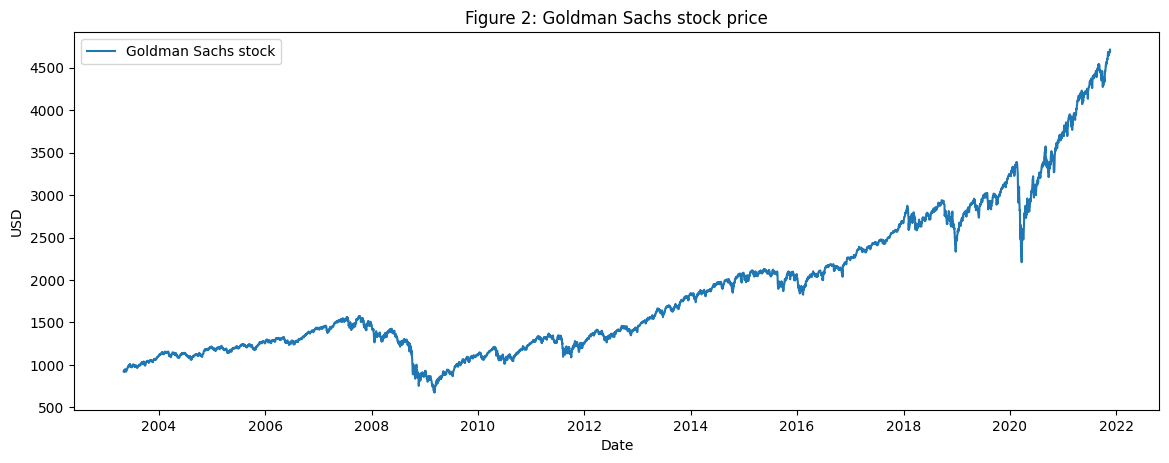

In [125]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(dataset_ex_df['Date'], dataset_ex_df['GS'], label='Goldman Sachs stock')
# plt.vlines(datetime.date(2016,4, 20), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 2: Goldman Sachs stock price')
plt.legend()
plt.show()

In [126]:
num_training_days = int(dataset_ex_df.shape[0]*.7)
print('Number of training days: {}. Number of test days: {}.'.format(num_training_days, dataset_ex_df.shape[0]-num_training_days))

Number of training days: 4153. Number of test days: 1781.


In [151]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['GS'].rolling(window=7).mean()
    dataset['ma21'] = dataset['GS'].rolling(window=21).mean()

    # Create MACD
	# candles['ema20'] = pd.Series.ewm(candles['<CLOSE>'], span=20).mean()
    dataset['26ema'] = pd.Series.ewm(dataset['GS'], span=26).mean()
    dataset['12ema'] = pd.Series.ewm(dataset['GS'], span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    # dataset['20sd'] = pd.stats.moments.rolling_std(dataset['GS'],20)
    # dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    # dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)

    # Create Exponential moving average
    dataset['ema'] = dataset['GS'].ewm(com=0.5).mean()

    # Create Momentum
    dataset['momentum'] = dataset['GS']-1

    return dataset

In [152]:
dataset_TI_df = get_technical_indicators(dataset_ex_df[['GS']])
dataset_TI_df.head()

,GS,ma7,ma21,26ema,12ema,MACD,ema,momentum
0,925.00,NaN,NaN,925.000000,925.000000,0.000000,925.00000,924.00
1,934.00,NaN,NaN,929.673077,929.875000,0.201923,931.75000,933.00
2,928.50,NaN,NaN,929.251602,929.338337,0.086735,929.50000,927.50
3,919.25,NaN,NaN,926.455591,926.153843,-0.301748,922.58125,918.25
4,932.75,NaN,NaN,927.915290,927.945996,0.030705,929.38843,931.75


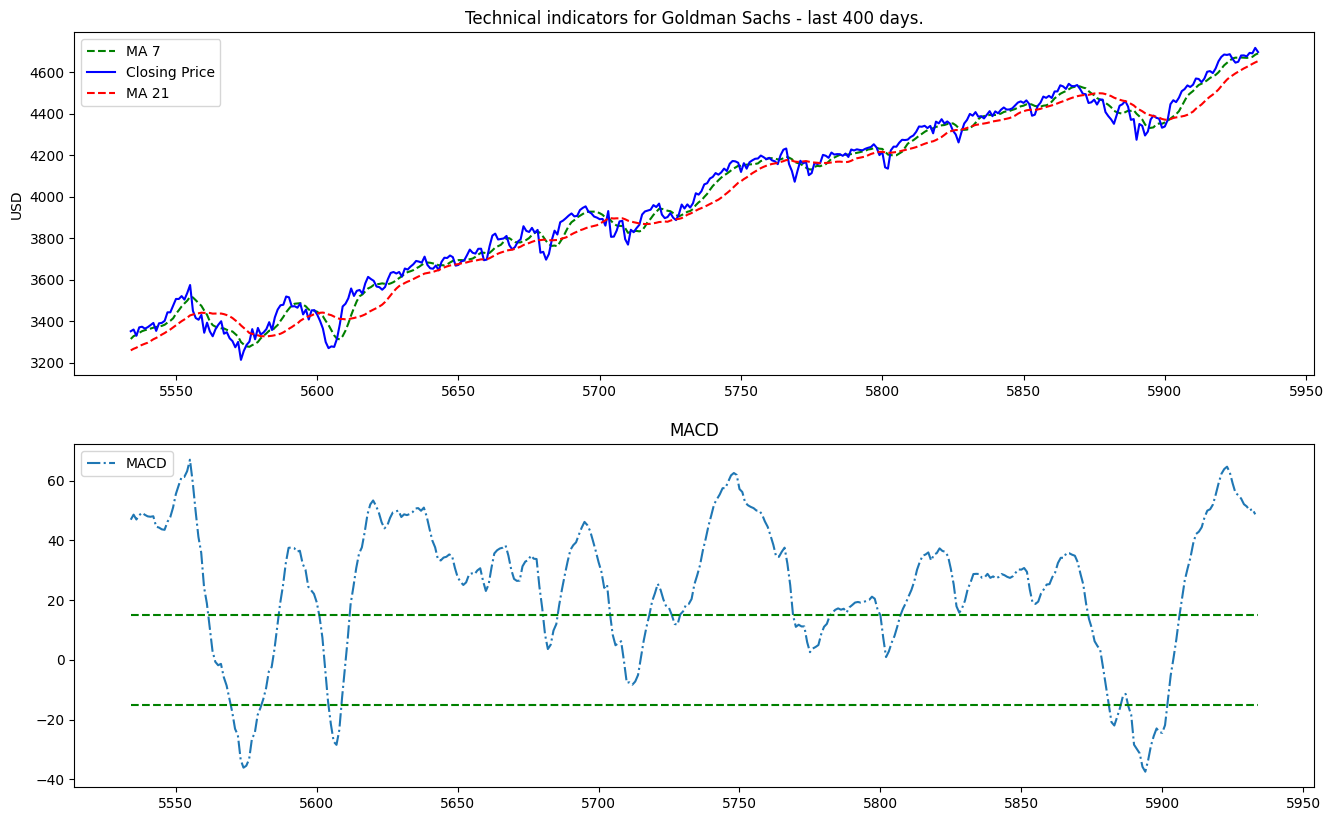

In [155]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days

    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['GS'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    # plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    # plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    # plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    # plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()
plot_technical_indicators(dataset_TI_df, 400)

In [156]:
# just import bert
import bert
data_FT = dataset_ex_df[['Date', 'GS']]

/Users/mazeinsv/PycharmProjects/python.Neural.Market/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/mazeinsv/PycharmProjects/python.Neural.Market/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/mazeinsv/PycharmProjects/python.Neural.Market/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/mazeinsv/PycharmProjects/python.Neural.Market/venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


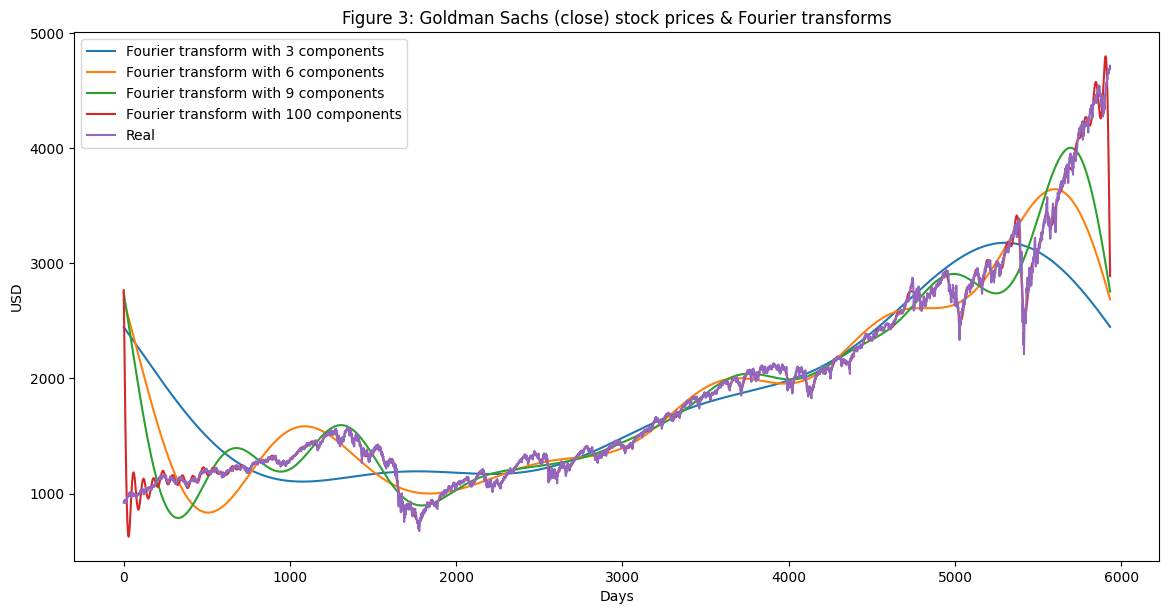

In [157]:
close_fft = np.fft.fft(np.asarray(data_FT['GS'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['GS'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Goldman Sachs (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

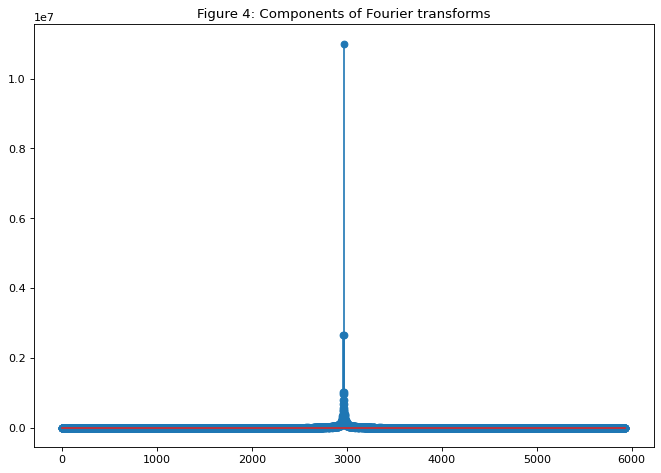

In [158]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure 4: Components of Fourier transforms')
plt.show()

In [161]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from datetime import datetime

series = data_FT['GS']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [162]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

ModuleNotFoundError: No module named 'pandas.tools'

In [163]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

/var/folders/92/nwcr41r54dl8w3bkn9lrs8100000gn/T/ipykernel_35496/289115997.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


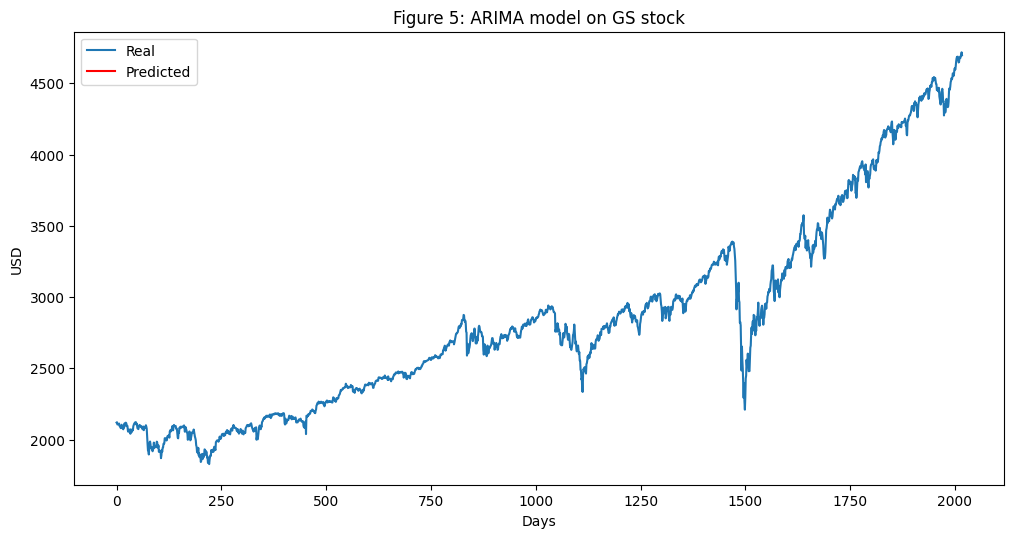

In [164]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on GS stock')
plt.legend()
plt.show()

In [165]:
dataset_total_df = dataset_TI_df
print('Total dataset has {} samples, and {} features.'.format(dataset_total_df.shape[0], dataset_total_df.shape[1]))

Total dataset has 5934 samples, and 8 features.


In [169]:
import xgboost as xgb
def get_feature_importance_data(data_income):
    data = data_income.copy()
    y = data['GS']
    X = data.iloc[:, 1:]

    train_samples = int(X.shape[0] * 0.65)

    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]

    return (X_train, y_train), (X_test, y_test)
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(dataset_TI_df)
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)
xgbModel = regressor.fit(X_train_FI,y_train_FI, eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], verbose=False)
eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))

plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/mazeinsv/PycharmProjects/python.Neural.Market/venv/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/mazeinsv/PycharmProjects/python.Neural.Market/venv/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


NameError: name 'xgbModel' is not defined

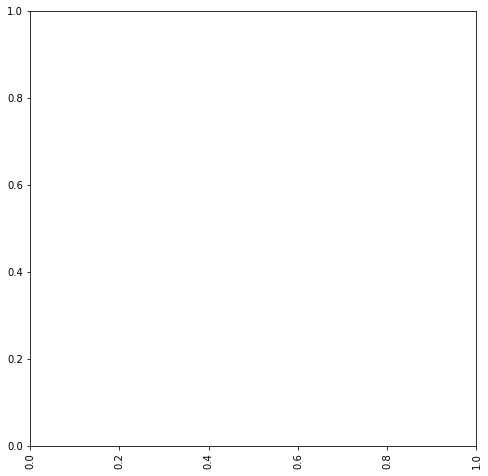

In [171]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure 6: Feature importance of the technical indicators.')
plt.show()

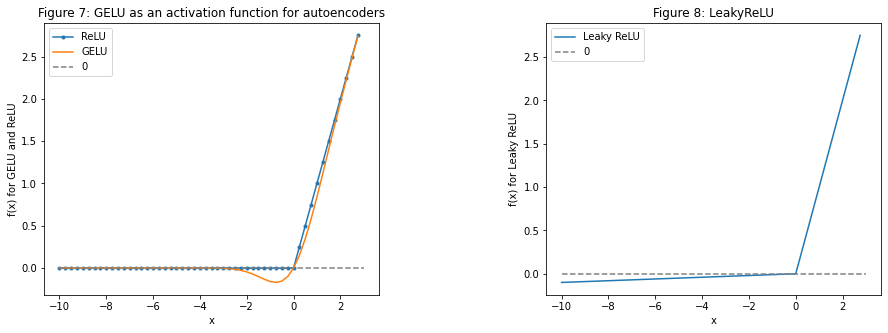

In [172]:
def gelu(x):
    return 0.5 * x * (1 + math.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * math.pow(x, 3))))
def relu(x):
    return max(x, 0)
def lrelu(x):
    return max(0.01*x, x)

plt.figure(figsize=(15, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=None)

ranges_ = (-10, 3, .25)

plt.subplot(1, 2, 1)
plt.plot([i for i in np.arange(*ranges_)], [relu(i) for i in np.arange(*ranges_)], label='ReLU', marker='.')
plt.plot([i for i in np.arange(*ranges_)], [gelu(i) for i in np.arange(*ranges_)], label='GELU')
plt.hlines(0, -10, 3, colors='gray', linestyles='--', label='0')
plt.title('Figure 7: GELU as an activation function for autoencoders')
plt.ylabel('f(x) for GELU and ReLU')
plt.xlabel('x')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([i for i in np.arange(*ranges_)], [lrelu(i) for i in np.arange(*ranges_)], label='Leaky ReLU')
plt.hlines(0, -10, 3, colors='gray', linestyles='--', label='0')
plt.ylabel('f(x) for Leaky ReLU')
plt.xlabel('x')
plt.title('Figure 8: LeakyReLU')
plt.legend()

plt.show()

In [173]:
VAE_data = dataset_TI_df
batch_size = 64
n_batches = VAE_data.shape[0]/batch_size
VAE_data = VAE_data.values

train_iter = mx.io.NDArrayIter(data={'data': VAE_data[:num_training_days,:-1]}, \
                               label={'label': VAE_data[:num_training_days, -1]}, batch_size = batch_size)
test_iter = mx.io.NDArrayIter(data={'data': VAE_data[num_training_days:,:-1]}, \
                              label={'label': VAE_data[num_training_days:,-1]}, batch_size = batch_size)

In [174]:
model_ctx =  mx.cpu()
class VAE(gluon.HybridBlock):
    def __init__(self, n_hidden=400, n_latent=2, n_layers=1, n_output=784, \
                 batch_size=100, act_type='relu', **kwargs):
        self.soft_zero = 1e-10
        self.n_latent = n_latent
        self.batch_size = batch_size
        self.output = None
        self.mu = None
        super(VAE, self).__init__(**kwargs)

        with self.name_scope():
            self.encoder = nn.HybridSequential(prefix='encoder')

            for i in range(n_layers):
                self.encoder.add(nn.Dense(n_hidden, activation=act_type))
            self.encoder.add(nn.Dense(n_latent*2, activation=None))

            self.decoder = nn.HybridSequential(prefix='decoder')
            for i in range(n_layers):
                self.decoder.add(nn.Dense(n_hidden, activation=act_type))
            self.decoder.add(nn.Dense(n_output, activation='sigmoid'))

    def hybrid_forward(self, F, x):
        h = self.encoder(x)
        #print(h)
        mu_lv = F.split(h, axis=1, num_outputs=2)
        mu = mu_lv[0]
        lv = mu_lv[1]
        self.mu = mu

        eps = F.random_normal(loc=0, scale=1, shape=(self.batch_size, self.n_latent), ctx=model_ctx)
        z = mu + F.exp(0.5*lv)*eps
        y = self.decoder(z)
        self.output = y

        KL = 0.5*F.sum(1+lv-mu*mu-F.exp(lv),axis=1)
        logloss = F.sum(x*F.log(y+self.soft_zero)+ (1-x)*F.log(1-y+self.soft_zero), axis=1)
        loss = -logloss-KL

        return loss

In [175]:
n_hidden=400 # neurons in each layer
n_latent=2
n_layers=3 # num of dense layers in encoder and decoder respectively
n_output=VAE_data.shape[1]-1

net = VAE(n_hidden=n_hidden, n_latent=n_latent, n_layers=n_layers, n_output=n_output, batch_size=batch_size, act_type='gelu')

In [177]:
net.collect_params().initialize(mx.init.Xavier(), ctx=mx.cpu())
net.hybridize()
trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': .01})

print(net)

VAE(
  (encoder): HybridSequential(
    (0): Dense(None -> 400, Activation(gelu))
    (1): Dense(None -> 400, Activation(gelu))
    (2): Dense(None -> 400, Activation(gelu))
    (3): Dense(None -> 4, linear)
  )
  (decoder): HybridSequential(
    (0): Dense(None -> 400, Activation(gelu))
    (1): Dense(None -> 400, Activation(gelu))
    (2): Dense(None -> 400, Activation(gelu))
    (3): Dense(None -> 7, Activation(sigmoid))
  )
)


/Users/mazeinsv/PycharmProjects/python.Neural.Market/venv/lib/python3.8/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'vae0_dense0_bias' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)
/Users/mazeinsv/PycharmProjects/python.Neural.Market/venv/lib/python3.8/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'vae0_dense1_bias' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)
/Users/mazeinsv/PycharmProjects/python.Neural.Market/venv/lib/python3.8/site-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'vae0_dense2_bias' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)
/Users/mazeinsv/PycharmProjects/python.Neural.Market/venv/lib/python3.8/site-packages/mxnet/gluon/parameter.py:896: UserWarning

In [180]:
n_epoch = 150
print_period = n_epoch // 10
start = time.time()

training_loss = []
validation_loss = []
for epoch in range(n_epoch):
    epoch_loss = 0
    epoch_val_loss = 0

    train_iter.reset()
    test_iter.reset()

    n_batch_train = 0
    for batch in train_iter:
        n_batch_train +=1
        data = batch.data[0].as_in_context(mx.cpu())

        with autograd.record():
            loss = net(data)
        loss.backward()
        trainer.step(data.shape[0])
        epoch_loss += nd.mean(loss).asscalar()

    n_batch_val = 0
    for batch in test_iter:
        n_batch_val +=1
        data = batch.data[0].as_in_context(mx.cpu())
        loss = net(data)
        epoch_val_loss += nd.mean(loss).asscalar()

    epoch_loss /= n_batch_train
    epoch_val_loss /= n_batch_val

    training_loss.append(epoch_loss)
    validation_loss.append(epoch_val_loss)

    """if epoch % max(print_period, 1) == 0:
        print('Epoch {}, Training loss {:.2f}, Validation loss {:.2f}'.\
              format(epoch, epoch_loss, epoch_val_loss))"""

end = time.time()
print('Training completed in {} seconds.'.format(int(end-start)))

MXNetError: MXNetError: Invalid Input: 'gelu', valid values are: {'relu', 'sigmoid', 'softrelu', 'softsign', 'tanh'}, in operator Activation(name="", act_type="gelu")

In [181]:
dataset_total_df['Date'] = dataset_ex_df['Date']

In [182]:
vae_added_df = mx.nd.array(dataset_total_df.iloc[:, :-1].values)

In [183]:
print('The shape of the newly created (from the autoencoder) features is {}.'.format(vae_added_df.shape))

The shape of the newly created (from the autoencoder) features is (5934, 8).


In [184]:
# We want the PCA to create the new components to explain 80% of the variance
pca = PCA(n_components=.8)
x_pca = StandardScaler().fit_transform(vae_added_df)
principalComponents = pca.fit_transform(x_pca)
principalComponents.n_components_

ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 32.

In [185]:
gan_num_features = dataset_total_df.shape[1]
sequence_length = 17

class RNNModel(gluon.Block):
    def __init__(self, num_embed, num_hidden, num_layers, bidirectional=False, \
                 sequence_length=sequence_length, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.num_hidden = num_hidden
        with self.name_scope():
            self.rnn = rnn.LSTM(num_hidden, num_layers, input_size=num_embed, \
                                bidirectional=bidirectional, layout='TNC')

            self.decoder = nn.Dense(1, in_units=num_hidden)

    def forward(self, inputs, hidden):
        output, hidden = self.rnn(inputs, hidden)
        decoded = self.decoder(output.reshape((-1, self.num_hidden)))
        return decoded, hidden

    def begin_state(self, *args, **kwargs):
        return self.rnn.begin_state(*args, **kwargs)

lstm_model = RNNModel(num_embed=gan_num_features, num_hidden=500, num_layers=1)
lstm_model.collect_params().initialize(mx.init.Xavier(), ctx=mx.cpu())
trainer = gluon.Trainer(lstm_model.collect_params(), 'adam', {'learning_rate': .01})
loss = gluon.loss.L1Loss()

In [186]:
print(lstm_model)

RNNModel(
  (rnn): LSTM(9 -> 500, TNC)
  (decoder): Dense(500 -> 1, linear)
)


In [187]:
class TriangularSchedule():
    def __init__(self, min_lr, max_lr, cycle_length, inc_fraction=0.5):
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.cycle_length = cycle_length
        self.inc_fraction = inc_fraction

    def __call__(self, iteration):
        if iteration <= self.cycle_length*self.inc_fraction:
            unit_cycle = iteration * 1 / (self.cycle_length * self.inc_fraction)
        elif iteration <= self.cycle_length:
            unit_cycle = (self.cycle_length - iteration) * 1 / (self.cycle_length * (1 - self.inc_fraction))
        else:
            unit_cycle = 0
        adjusted_cycle = (unit_cycle * (self.max_lr - self.min_lr)) + self.min_lr
        return adjusted_cycle

class CyclicalSchedule():
    def __init__(self, schedule_class, cycle_length, cycle_length_decay=1, cycle_magnitude_decay=1, **kwargs):
        self.schedule_class = schedule_class
        self.length = cycle_length
        self.length_decay = cycle_length_decay
        self.magnitude_decay = cycle_magnitude_decay
        self.kwargs = kwargs

    def __call__(self, iteration):
        cycle_idx = 0
        cycle_length = self.length
        idx = self.length
        while idx <= iteration:
            cycle_length = math.ceil(cycle_length * self.length_decay)
            cycle_idx += 1
            idx += cycle_length
        cycle_offset = iteration - idx + cycle_length

        schedule = self.schedule_class(cycle_length=cycle_length, **self.kwargs)
        return schedule(cycle_offset) * self.magnitude_decay**cycle_idx

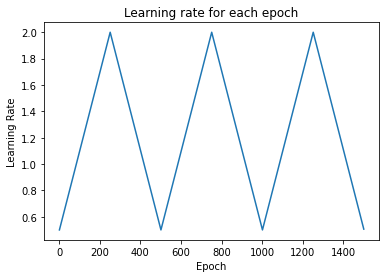

In [188]:
schedule = CyclicalSchedule(TriangularSchedule, min_lr=0.5, max_lr=2, cycle_length=500)
iterations=1500

plt.plot([i+1 for i in range(iterations)],[schedule(i) for i in range(iterations)])
plt.title('Learning rate for each epoch')
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.show()

In [189]:
num_fc = 512

# ... other parts of the GAN

cnn_net = gluon.nn.Sequential()
with net.name_scope():

    # Add the 1D Convolutional layers
    cnn_net.add(gluon.nn.Conv1D(32, kernel_size=5, strides=2))
    cnn_net.add(nn.LeakyReLU(0.01))
    cnn_net.add(gluon.nn.Conv1D(64, kernel_size=5, strides=2))
    cnn_net.add(nn.LeakyReLU(0.01))
    cnn_net.add(nn.BatchNorm())
    cnn_net.add(gluon.nn.Conv1D(128, kernel_size=5, strides=2))
    cnn_net.add(nn.LeakyReLU(0.01))
    cnn_net.add(nn.BatchNorm())

    # Add the two Fully Connected layers
    cnn_net.add(nn.Dense(220, use_bias=False), nn.BatchNorm(), nn.LeakyReLU(0.01))
    cnn_net.add(nn.Dense(220, use_bias=False), nn.Activation(activation='relu'))
    cnn_net.add(nn.Dense(1))

# ... other parts of the GAN

In [190]:
print(cnn_net)

Sequential(
  (0): Conv1D(None -> 32, kernel_size=(5,), stride=(2,))
  (1): LeakyReLU(0.01)
  (2): Conv1D(None -> 64, kernel_size=(5,), stride=(2,))
  (3): LeakyReLU(0.01)
  (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=None)
  (5): Conv1D(None -> 128, kernel_size=(5,), stride=(2,))
  (6): LeakyReLU(0.01)
  (7): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=None)
  (8): Dense(None -> 220, linear)
  (9): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=None)
  (10): LeakyReLU(0.01)
  (11): Dense(None -> 220, linear)
  (12): Activation(relu)
  (13): Dense(None -> 1, linear)
)


In [191]:
# Initialize the optimizer
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

utility = UtilityFunction(kind="ucb", kappa=2.5, xi=0.0)

In [193]:
from utils import plot_prediction
plot_prediction('Predicted and Real price - after first epoch.')

ImportError: cannot import name 'plot_prediction' from 'utils' (/Users/mazeinsv/PycharmProjects/python.Neural.Market/venv/lib/python3.8/site-packages/utils/__init__.py)